In [ ]:
# Importando as bibliotecas
from LightPipes import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [ ]:
# Definindo os campo e constante da Eq.32
def Lambda(M,N,sigma,delta):
  a = 1/(4*sigma**2) #
  b = 1/(2*delta**2) #
  c = 2*np.sqrt( a**2 + 2*a*b )
  L = ( np.pi/(a + b + c/2) )*( (a + b - c/2)/( a + b + c/2 ) )**( abs(M)/2 + N )
  return L

def Laguerre_G(n,m,sigma,delta):
    a = 1/(4*sigma**2) # [L]^-2
    b = 1/(2*delta**2) # [L]^-2
    c = 2*np.sqrt( a**2 + 2*a*b )
    w = np.sqrt( 2/c )

    x = np.arange(-N/2, N/2,1)*dx
    xx,yy = np.meshgrid(x,x)

    r    = np.sqrt(xx**2+yy**2)
    C    = np.sqrt(2*math.factorial(jj)/(np.pi*math.factorial(n+abs(m))))
    PL   = sp.special.assoc_laguerre(2*r**2/w**2,n,abs(m))
    Fase = np.exp(- 1j*m*np.arctan2(yy,xx) )

    LG   = C*1/w*(r*np.sqrt(2)/w)**abs(m)*PL*np.exp(-r**2/w**2)*Fase
    return LG

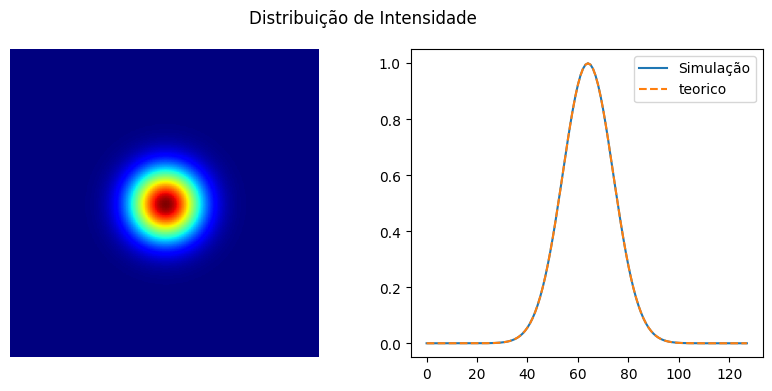

In [ ]:
#Parâmetros do feixe GSM
sigma = .1*mm        # largura do feixe
delta = .1*mm        # comprimento de coerência
L = 10
P = 5

lambd = 620*nm        # light wavelength
N     = 2**7          # Dimensão
dx    = 10*um         # Tamanho do pixel

# Gerando os campos para a soma incoerente
Numero_de_Soma_Inc = (2*L+1)*(P+1)
Campo =  np.exp( 1j*np.zeros((N,N,Numero_de_Soma_Inc))) # Campo

i = 0
for j in range(-L,L+1):
  for jj in range(P+1):
    Campo[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*Laguerre_G(n=jj,m=j,sigma=sigma,delta=delta)
    i += 1

##### Visualizando os resultados #####
x = np.arange(-N/2, N/2,1)*dx
teorico = np.exp(-x**2/(2*sigma**2) )

A = np.sum(abs(Campo**2),2)# campo total --> soma incoerente
A = A/A.max() # Normalizando

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Distribuição de Intensidade')

ax1.imshow(A,cmap="jet")
ax1.set_axis_off()
ax2.plot(A[:,N//2],label="Simulação")
ax2.plot(teorico,"--" ,label="teorico")
plt.legend()
plt.savefig("intensdade_gsm.png")
plt.tight_layout
plt.show()


Agora iremos ver para qual valor do trucamente a curva de intesidade da simulação ainda continuas obedecendo a teorica.

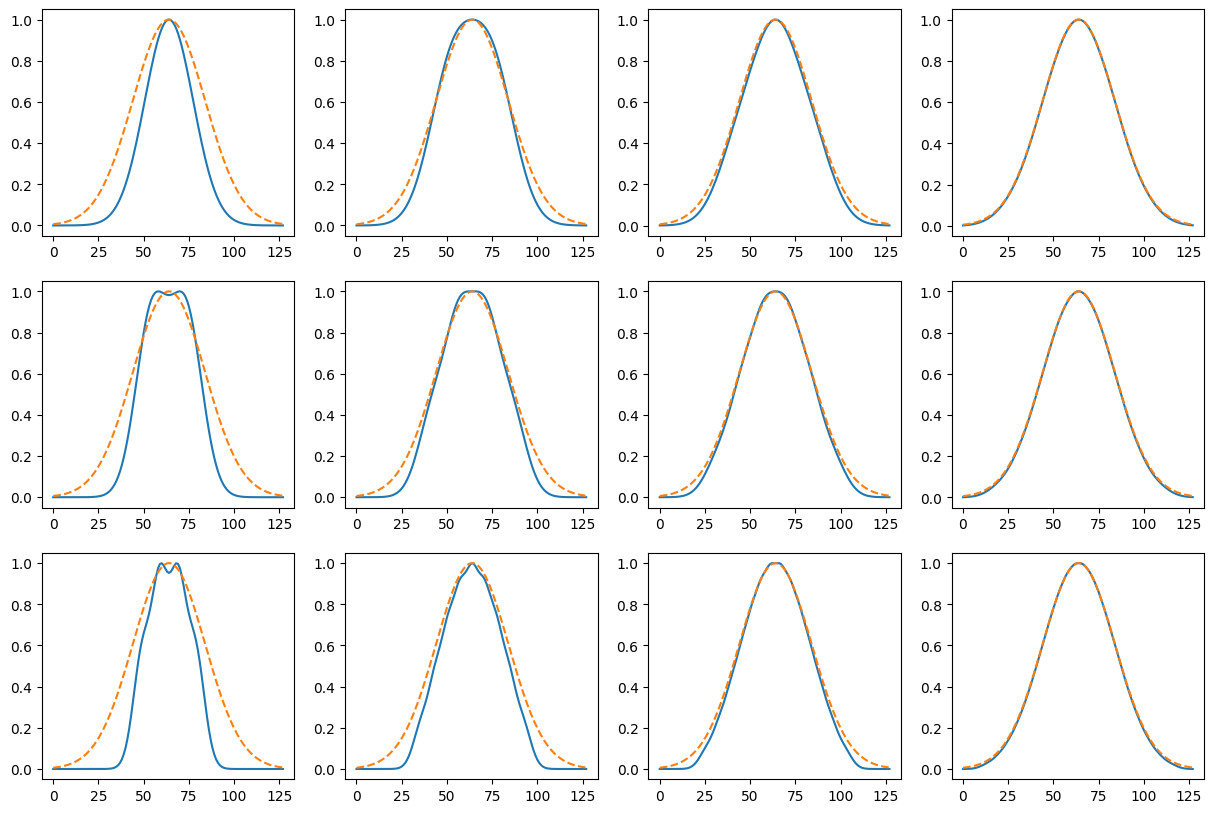

In [ ]:
#Parâmetros do feixe GSM
lambd = 620*nm        # light wavelength
N     = 2**7          # Dimensão
dx    = 10*um         # Tamanho do pixel
sigma = .2*mm        # largura

L = 50
P = 50

x = np.arange(-N/2, N/2,1)*dx
teorico = np.exp(-x**2/(2*sigma**2) )

trucamento = [0.5,0.2,0.07,0.015]

fig, (ax) = plt.subplots(3,4,figsize=(15,10))
deltas = [0.2,0.1,0.04]
for delt in range(len(deltas)):
    delta = deltas[delt]*mm        # comprimento de coerência
    for index in range(len(trucamento)):
        Numero_de_Soma_Inc = 0
        for j in range(-L,L+1):
            for jj in range(P+1):
                cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
                if (cutoff >= trucamento[index]):
                    Numero_de_Soma_Inc +=1

        #Gerando os campos para a soma incoerente
        Campo =  np.exp( 1j*np.zeros((N,N,Numero_de_Soma_Inc))) # Campo

        i = 0
        for j in range(-L,L+1):
            for jj in range(P+1):
                cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
                if (cutoff >= trucamento[index]):
                    Campo[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*Laguerre_G(n=jj,m=j,sigma=sigma,delta=delta)
                    i += 1

        # campo total --> soma incoerente
        Intensidade = np.sum(abs(Campo**2),2)
        Intensidade = Intensidade/Intensidade.max()


        ax[delt,index].plot(Intensidade[:,N//2])
        ax[delt,index].plot(teorico,"--")
